In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.notebook import tqdm

In [2]:
# loading  onehot covid sequnece csv data.
source_covid_csv_data = pd.read_csv('/media/john/DatasetCGRD/20221004-covid-data/diff-may-june-for-data-20220902-with-rm-0-sd-20220914-clean.csv')

In [3]:
source_covid_csv_data_col = source_covid_csv_data.columns
source_covid_csv_data_diff = source_covid_csv_data[source_covid_csv_data_col[0]]
source_covid_csv_data_sequnce = source_covid_csv_data[source_covid_csv_data_col[1::]].values
# del source_covid_csv_data

In [4]:
# # only tcga rna unit
def clean(x):
	x = x.upper() 
	
	if x == 'T' or x == 'A' or x == 'G' or x == 'C' or x == '-' or x == 'N':
		return x

	if x == 'U' or x == 'Y':
		return 'T'
	
	if x == 'K' or x == 'S':
		return 'G'

	if x == 'M' or x == 'R' or x == 'W' or x == 'H' or x=='V' or x=='D':
		return 'A'

	if x== 'B':
		return 'C'
from itertools import product
dict_search = {}
for idx, i in enumerate('TCAGN-'):

    dict_search[i] = idx
print(dict_search)
from tqdm.notebook import tqdm
num_new_sequences =[]
for k in tqdm(source_covid_csv_data_sequnce):
	temp_store=[]
	for j in k:
		temp_store.append(dict_search[clean(j)])
	num_new_sequences.append(temp_store)
total_sequence_array = np.array(num_new_sequences)
del num_new_sequences, source_covid_csv_data, source_covid_csv_data_sequnce
print(total_sequence_array.shape)

{'T': 0, 'C': 1, 'A': 2, 'G': 3, 'N': 4, '-': 5}


  0%|          | 0/20592 [00:00<?, ?it/s]

(20592, 29247)


In [6]:
total_sequence_array.shape
train_sequence_array = total_sequence_array[0:1000]
print("Total .shape: {}".format(total_sequence_array.shape))
print("Train .shape: {}".format(train_sequence_array.shape))

Total .shape: (20592, 29247)
Train .shape: (1000, 29247)


In [7]:
# https://github.com/alok-ai-lab/pyDeepInsight << Detail code
# CPU TSNE
from pyDeepInsight.image_transformer import ImageTransformer, LogScaler
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
ln = LogScaler()
X_train_norm = ln.fit_transform(train_sequence_array)
tsne = TSNE(n_components=2, perplexity=50, metric='cosine',
            random_state=1701, n_jobs=-1)

it = ImageTransformer(feature_extractor=tsne, pixels=100)
X_train_img = it.fit_transform(X_train_norm)

/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [ ]:
# Save TSNE model
# Scickit Learn tsne model dosen't had save function, only can save model value format
import pickle as pk, os
save_model_path = './deepinsight_location_npy/'
save_name = 'BA-20000-tsne-binary-perplexity=50-pixel=100.pkl'
pk.dump(it, open(os.path.join(save_model_path, save_name),"wb"))

In [8]:
print(it.feature_density_matrix().shape)
print(it.coords().shape)
np.sum(np.array(it.feature_density_matrix())>0)

(100, 100)
(29247, 2)


5526

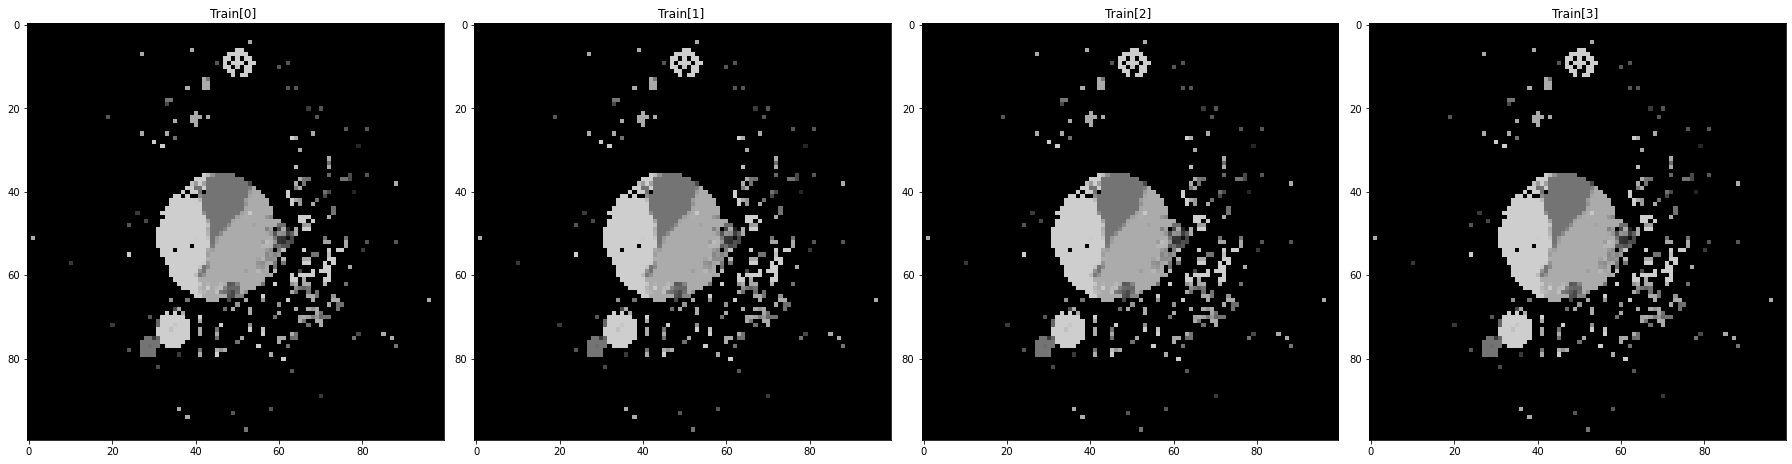

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] ".format(i))
plt.tight_layout()

In [19]:
# transform total sequnce to image
total_sequence_tsne_image_ = it.transform(total_sequence_array)
total_sequence_tsne_image_.shape

(20592, 100, 100, 3)

In [20]:
# multiclass_nactg multiclass_totalunit
# save_path = './np_image_totalunit/multiclass_nactg_200px/'
save_path = './np_image_totalunit/BA-20000-tsne-binary-perplexity=50-pixel=100/'
if not os.path.exists(save_path):
    os.mkdir(save_path)
if not os.path.exists(os.path.join(save_path,'image_npy')):
    os.mkdir(os.path.join(save_path,'image_npy'))


np.save(f'{save_path}/label.npy', source_covid_csv_data_diff.values)
for idx, image in enumerate(total_sequence_tsne_image_):
    if (idx)<10:
        np.save(f"{save_path}/image_npy/0000{idx}.npy", image)
    elif (idx)<100:
        np.save(f"{save_path}/image_npy/000{idx}.npy", image)
    elif (idx)<1000:
        np.save(f"{save_path}/image_npy/00{idx}.npy", image)
    elif (idx)<10000:
        np.save(f"{save_path}/image_npy/0{idx}.npy", image)
    else:
        np.save(f"{save_path}/image_npy/{idx}.npy", image)

In [22]:
#save total sequnce data to numpy
np.save(f"{save_path}/total_seq_array", total_sequence_array)